In [1]:
# EacyOCR 사용하기
from easyocr import Reader
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [2]:
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [3]:
gpu = True

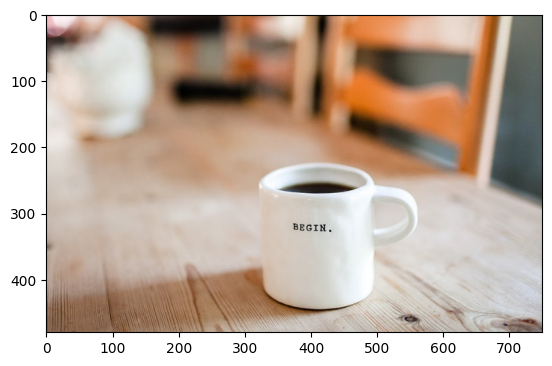

In [4]:
img = cv2.imread('./OCR_with_Python/Images/cup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
original = img.copy()

In [6]:
reader = Reader(languages_list, gpu)
result = reader.readtext(img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.6624375575121239)]

In [7]:
# Writing the result on the image
font = './OCR_with_Python/Fonts/calibri.ttf'

In [8]:
def write_text(img, text, x, y, font, color=(50, 50, 255), font_size=22):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill=color)
    img = np.array(img_pil)
    return img

In [9]:
# Bouding Box
#   - lt: left top
#   - rt: right top
#   - br: bottom right
#   - bl: bottom left
def box_coordinates(box):
    (lt, rt, br, bl) = box
    lt = (int(lt[0]), int(lt[1]))
    rt = (int(rt[0]), int(rt[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    return lt, rt, br, bl

def draw_img(img, lt, br, color=(200, 255, 0), thickness=2):
    cv2.rectangle(img, lt, br, color, thickness)
    return img

In [10]:
result[0][0]

[[373, 313], [435, 313], [435, 331], [373, 331]]

In [11]:
box_coordinates(result[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [12]:
img = original.copy()

for (box, text, probability) in result:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)

[[373, 313], [435, 313], [435, 331], [373, 331]] BEGIN . 0.6624375575121239


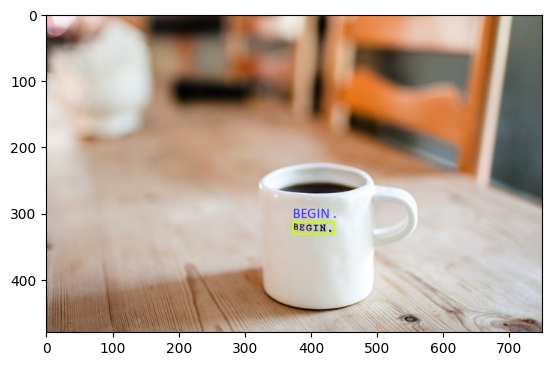

In [13]:
plt.imshow(img)

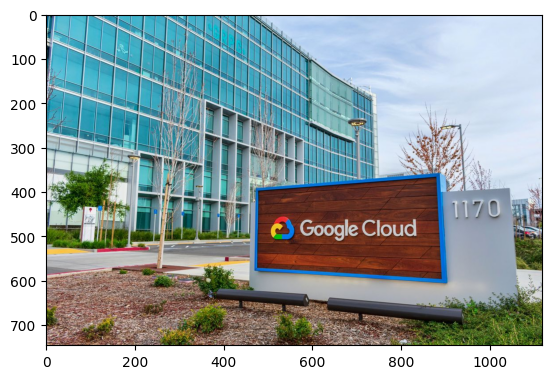

In [14]:
google_img = cv2.imread('./OCR_with_Python/Images/google-cloud.jpg')
google_img = cv2.cvtColor(google_img, cv2.COLOR_BGR2RGB)
plt.imshow(google_img)

In [15]:
reader = Reader(languages_list, gpu)
results = reader.readtext(google_img)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[910, 412], [1034, 412], [1034, 468], [910, 468]],
  '1170',
  0.9022491574287415),
 ([[566, 454], [845, 454], [845, 520], [566, 520]],
  'Google Cloud',
  0.9972324528667974)]

[[910, 412], [1034, 412], [1034, 468], [910, 468]] 1170 0.9022491574287415
[[566, 454], [845, 454], [845, 520], [566, 520]] Google Cloud 0.9972324528667974


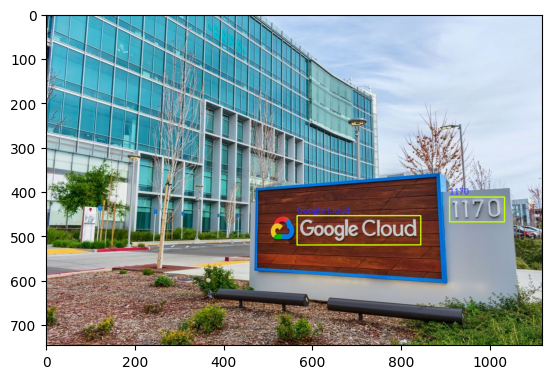

In [16]:
img = google_img.copy()

for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)
plt.imshow(img)

In [17]:
lang_list = ['en', 'fr']
lang_list

['en', 'fr']

In [18]:
img = cv2.imread('./OCR_with_Python/Images/french.jpg')
reader = Reader(lang_list, gpu)
results = reader.readtext(img)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[216, 122], [370, 122], [370, 170], [216, 170]],
  'Mairie du /"',
  0.8551352515248203),
 ([[257, 222], [378, 222], [378, 272], [257, 272]],
  '[Palais du',
  0.9349514190923051),
 ([[242, 322], [515, 322], [515, 376], [242, 376]],
  'LES ARTS DÉCORATIFS',
  0.9857393600746178),
 ([[262, 440], [481, 440], [481, 492], [262, 492]],
  'Musée du LOUVRE',
  0.994997176401167),
 ([[197, 537], [282, 537], [282, 577], [197, 577]],
  'Théâtre',
  0.9996403351282481),
 ([[195, 569], [377, 569], [377, 613], [195, 613]],
  'du PaLAIS-RoyAL',
  0.2672544317457907),
 ([[377.02985749985464, 236.11942999941868],
   [475.90943152163265, 248.1536282272754],
   [468.97014250014536, 283.8805700005813],
   [371.09056847836735, 270.8463717727246]],
  'LOUVRE',
  0.9939306332060088)]

[[216, 122], [370, 122], [370, 170], [216, 170]] Mairie du /" 0.8551352515248203
[[257, 222], [378, 222], [378, 272], [257, 272]] [Palais du 0.9349514190923051
[[242, 322], [515, 322], [515, 376], [242, 376]] LES ARTS DÉCORATIFS 0.9857393600746178
[[262, 440], [481, 440], [481, 492], [262, 492]] Musée du LOUVRE 0.994997176401167
[[197, 537], [282, 537], [282, 577], [197, 577]] Théâtre 0.9996403351282481
[[195, 569], [377, 569], [377, 613], [195, 613]] du PaLAIS-RoyAL 0.2672544317457907
[[377.02985749985464, 236.11942999941868], [475.90943152163265, 248.1536282272754], [468.97014250014536, 283.8805700005813], [371.09056847836735, 270.8463717727246]] LOUVRE 0.9939306332060088


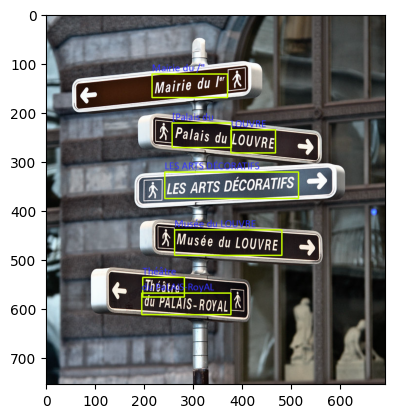

In [19]:
for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)
plt.imshow(img)

In [20]:
lang_list = ['en', 'ch_sim']
lang_list

['en', 'ch_sim']

In [21]:
font = '/OCR_with_Python/Fonts/simsun.ttc'

In [22]:
img = cv2.imread('./OCR_with_Python/Images/chinese.jpg')
reader = Reader(lang_list, gpu)
results = reader.readtext(img)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[86, 80], [134, 80], [134, 128], [86, 128]], '西', 0.8046873017200973),
 ([[187, 75], [469, 75], [469, 165], [187, 165]], '愚园路', 0.961498744742133),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], '东', 0.9945212748108503),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.9999931862770842),
 ([[514, 124], [574, 124], [574, 156], [514, 156]], '309', 0.9923930764198303),
 ([[81, 175], [125, 175], [125, 211], [81, 211]], 'I', 0.9336760421719106),
 ([[227, 174], [351, 174], [351, 218], [227, 218]],
  'Yuyuan',
  0.9889179724419518),
 ([[360, 176], [412, 176], [412, 208], [360, 208]], 'Rd_', 0.9809228608847558),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.4212512757034723)]

[[86, 80], [134, 80], [134, 128], [86, 128]] 西 0.8046873017200973
[[187, 75], [469, 75], [469, 165], [187, 165]] 愚园路 0.961498744742133
[[517, 81], [565, 81], [565, 123], [517, 123]] 东 0.9945212748108503
[[78, 126], [136, 126], [136, 156], [78, 156]] 315 0.9999931862770842
[[514, 124], [574, 124], [574, 156], [514, 156]] 309 0.9923930764198303
[[81, 175], [125, 175], [125, 211], [81, 211]] I 0.9336760421719106
[[227, 174], [351, 174], [351, 218], [227, 218]] Yuyuan 0.9889179724419518
[[360, 176], [412, 176], [412, 208], [360, 208]] Rd_ 0.9809228608847558
[[529, 173], [569, 173], [569, 213], [529, 213]] E 0.4212512757034723


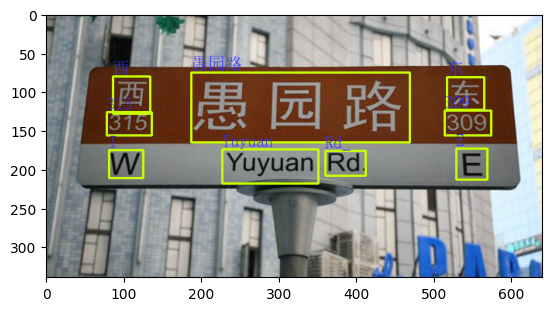

In [23]:
for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)
plt.imshow(img)

In [33]:
lang_list = ['en', 'ko']
font = './OCR_with_Python/Fonts/NanumSquareR.ttf'

In [41]:
img = cv2.imread('./OCR_with_Python/Images/kor_char2.jpg')
reader = Reader(lang_list, gpu)
results = reader.readtext(img)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [48, 0], [48, 46], [0, 46]], '견', 0.9935874360265338)]

[[0, 0], [48, 0], [48, 46], [0, 46]] 견 0.9935874360265338


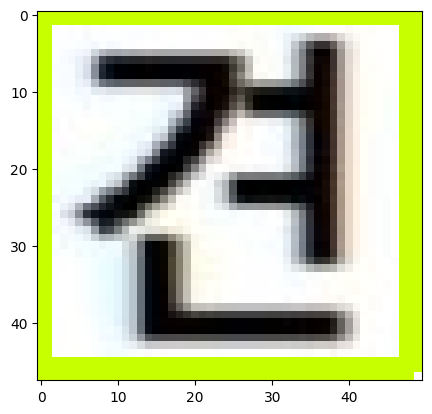

In [42]:
for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)
plt.imshow(img)